## Binary Classification on Iris Dataset
### Adaline Gradient Descent Model
This is a improvement on the previous model of Rosenblatt's Perceptron because it uses the method of gradient descent to reach the optimal weight's on the basis of using a linear activation function during updates and threshold function for outputs.

#### Use of Different Model Characteristics for better model learning
1.)We have showed the importance of feature scaling so that we would 
    reach the required weights and hence the optimal solution as fast as 
    possible and showed the different weights in comparison to not 
    feature sscaling which took a longer time.
    We used the standardization feature scaling.
    
2.) Showed the different in choosing different learning parameters which 
    showed that too small a parameter would take many epocs for training 
    and too large would overshoot the minima and could diverge.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Adaline_Gradient_Descent_Model import AdadlineGD as AGDM
from Adaline_Gradient_Descent_Model_SGD import AdalineSGD as ASGDM
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
def plot_decision_boundary(X,y,classifier,resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min , x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,c1 in enumerate(np.unique(y)):
        plt.scatter(x = X[y==c1,0],
                    y = X[y==c1,1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = c1,
                    edgecolors = 'black')

In [3]:
df = pd.read_csv('iris.data.txt',header = None)
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,4].values
y = np.where(y == 'Iris-setosa',1,-1)

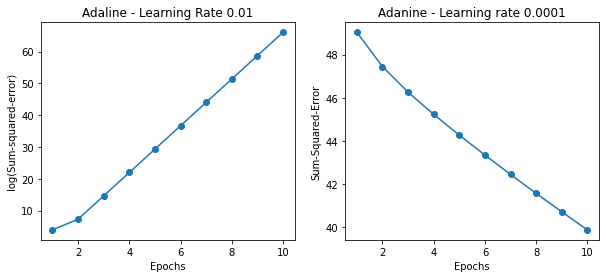

In [4]:
fib,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,4))

adal = AGDM(n_iter = 10,eta = 0.01).fit(X,y)
ax[0].plot(range(1, len(adal.cost_) + 1), np.log(adal.cost_),marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning Rate 0.01')

ada2 = AGDM(n_iter = 10,eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+ 1),ada2.cost_,marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-Squared-Error')
ax[1].set_title('Adanine - Learning rate 0.0001')
plt.show()

In [5]:
X_std = np.copy(X)
X_std[:,0]  = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1]  = (X[:,1] - X[:,1].mean()) / X[:,1].std()


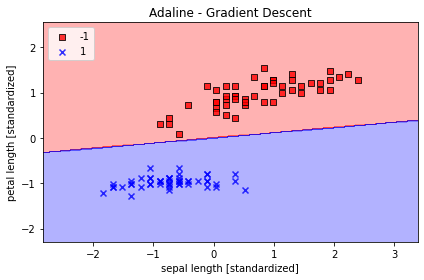

In [6]:
ada = AGDM(eta = 0.01,n_iter = 15)
ada.fit(X_std,y)

plot_decision_boundary(X_std,y,classifier = ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()


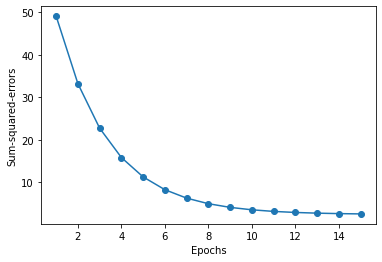

In [7]:
plt.plot(range(1, len(ada.cost_) + 1),ada.cost_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-errors')
plt.show()

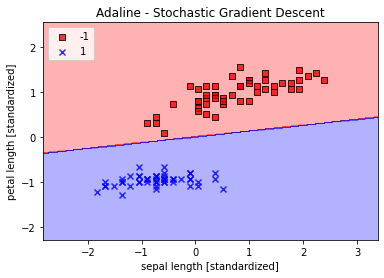

In [15]:
adas = ASGDM(n_iter = 15,eta = 0.01,random_state = 1)
adas.fit(X_std,y)

plot_decision_boundary(X_std,y,classifier = adas)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()


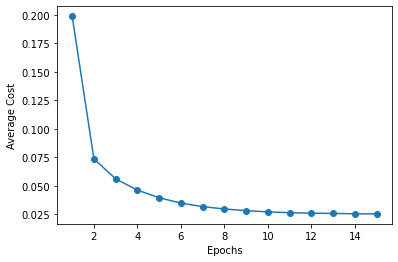

In [17]:
plt.plot(range(1,1 +  len(adas.cost_)),adas.cost_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()